In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data Preparation

In [3]:
# Importing the dataset
df=pd.read_csv("Salary_dataset.csv", low_memory=False)
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


### Dropping unwanted column

In [4]:
df = df.drop('Unnamed: 0', axis=1)
print("Dataset shape after cleaning:", df.shape)
print(df.head())

Dataset shape after cleaning: (30, 2)
   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0


In [5]:
X = df[['YearsExperience']]  #independent variable
y = df['Salary'] #dependent variable

### Training the model using Scikit Learn

In [98]:
#Train-Test Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 24
Test set size: 6


In [100]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Intercept: {model.intercept_:.2f}, Slope: {model.coef_[0]:.2f}")

Intercept: 24380.20, Slope: 9423.82


In [101]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Model Evaluation

In [102]:
# Evaluating model's performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"The r2 score performance for training dataset is: {test_r2}")
print(f"The r2 score performance for testing dataset is: {test_r2}")
print(f"The rmse value for the training dataset is: {train_rmse}")
print(f"The rmse value for the testing dataset is: {test_rmse}")
train_mse=mean_squared_error(y_train, y_train_pred)
test_mse=mean_squared_error(y_train,y_train_pred)
print(f"The mse value for train data is: {train_mse} and for the test data is: {test_mse}")

The r2 score performance for training dataset is: 0.9024461774180498
The r2 score performance for testing dataset is: 0.9024461774180498
The rmse value for the training dataset is: 5205.982110155715
The rmse value for the testing dataset is: 7059.043621901506
The mse value for train data is: 27102249.731261354 and for the test data is: 27102249.731261354


### Implementation of Gradient Descent

In [103]:
# Convert data to numpy arrays for easier calculations
X_train_gd = X_train.values.flatten()
y_train_gd = y_train.values.flatten()

In [104]:
# Initialize parameters and hyperparameters
w = 0  # Slope 
b = 0  # Intercept 
iterations = 1000  # Number of steps
alpha = 0.01  # Learning rate

In [105]:
#  Defining the cost function
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = (1/(2*m)) * np.sum((w * X + b - y)**2)
    return cost

In [106]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dj_dw = (1/m) * np.sum((w * X + b - y) * X)
    dj_db = (1/m) * np.sum(w * X + b - y)
    return dj_dw, dj_db

In [107]:
# 4. Run the gradient descent loop
for i in range(iterations):
    dj_dw, dj_db = compute_gradient(X_train_gd, y_train_gd, w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i % 100 == 0:
        cost = compute_cost(X_train_gd, y_train_gd, w, b)
        print(f"Iteration {i}: Cost = {cost:.2f}")

print("\nFinal parameters after gradient descent:")
print(f"Slope (w): {w:.2f}, Intercept (b): {b:.2f}")

Iteration 0: Cost = 1286096426.10
Iteration 100: Cost = 50427402.00
Iteration 200: Cost = 37092906.86
Iteration 300: Cost = 28580177.21
Iteration 400: Cost = 23145658.30
Iteration 500: Cost = 19676266.34
Iteration 600: Cost = 17461409.65
Iteration 700: Cost = 16047447.13
Iteration 800: Cost = 15144774.75
Iteration 900: Cost = 14568509.51

Final parameters after gradient descent:
Slope (w): 9774.10, Intercept (b): 21993.00


### Model Evaluation

In [108]:
# 5. Make predictions and evaluate the model
y_test_pred_gd = w * X_test.values.flatten() + b
rmse_gd = np.sqrt(mean_squared_error(y_test, y_test_pred_gd))
r2_gd = r2_score(y_test, y_test_pred_gd)
print(f"Test RMSE (GD): {rmse_gd:.2f}")
print(f"Test R2 Score (GD): {r2_gd:.2f}")

Test RMSE (GD): 7271.32
Test R2 Score (GD): 0.90


### Model Visualization

C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


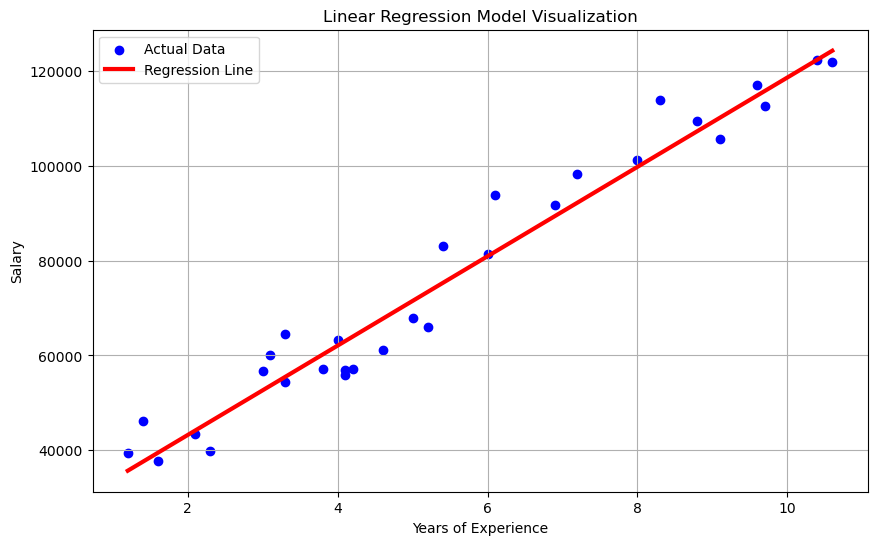

In [109]:
plt.figure(figsize=(10, 6))
# Plot the original data points as a scatter plot
plt.scatter(X, y, color='blue', label='Actual Data')
# Create a range of x values to draw a smooth regression line
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
# Use your trained model to predict the corresponding y values for the line
y_line = model.predict(x_line)
# Plot the regression line
plt.plot(x_line, y_line, color='red', linewidth=3, label='Regression Line')
# Add labels, a title, and a legend for clarity
plt.title('Linear Regression Model Visualization')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()